In [1]:
import pandas as pd

data = {
    'Mileage': [10, 12, 15, 18, 20, 22, 25, 28, 30, 32],
    'Price':   [8.5, 7.8, 7.0, 6.5, 6.0, 5.6, 5.0, 4.7, 4.5, 4.3]
}

df = pd.DataFrame(data)
print(df.head())


   Mileage  Price
0       10    8.5
1       12    7.8
2       15    7.0
3       18    6.5
4       20    6.0


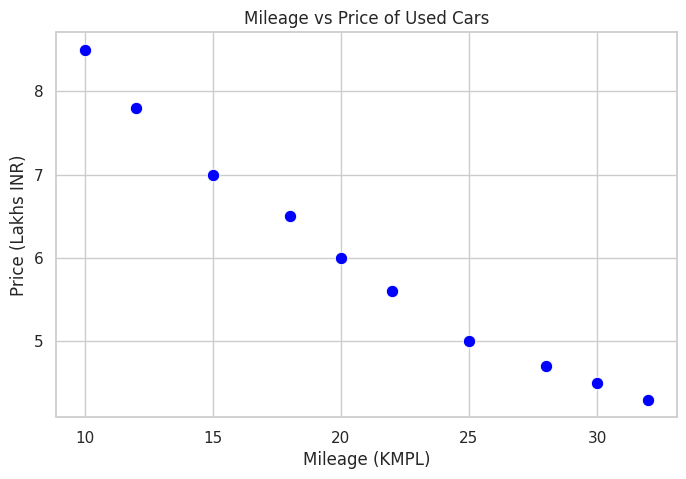

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
# Plot the data
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage', y='Price', data=df, color='blue', s=80)
plt.title("Mileage vs Price of Used Cars")
plt.xlabel("Mileage (KMPL)")
plt.ylabel("Price (Lakhs INR)")

plt.show()


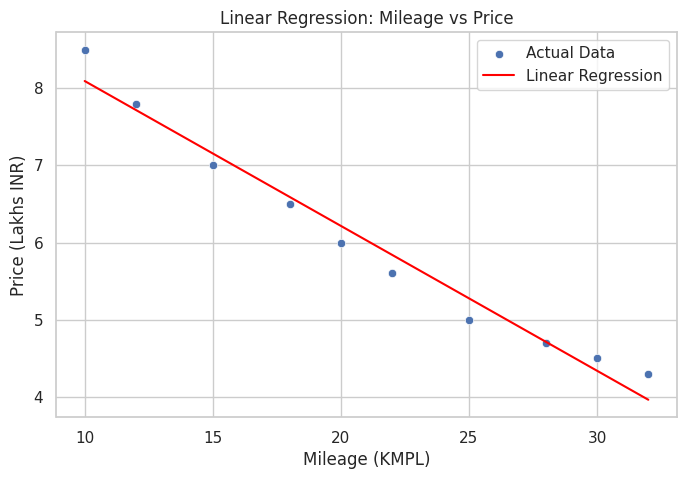

In [3]:
from sklearn.linear_model import LinearRegression
X = df[['Mileage']] 
y = df['Price'] # Target
linear_model = LinearRegression()
linear_model.fit(X, y)

df['Linear_Pred'] = linear_model.predict(X)

#Plot actual vs predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage', y='Price', data=df, label='Actual Data')
sns.lineplot(x='Mileage', y='Linear_Pred', data=df, color='red', label='Linear Regression')
plt.title("Linear Regression: Mileage vs Price")
plt.xlabel("Mileage (KMPL)")
plt.ylabel("Price (Lakhs INR)")
plt.legend()
plt.show()


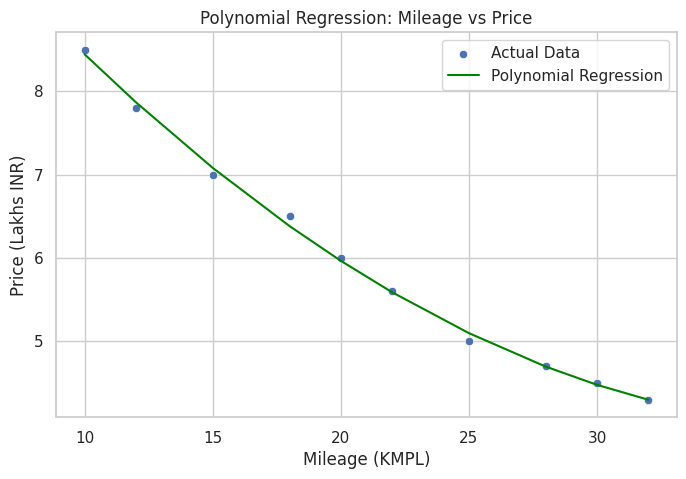

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

#Create and train the model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

#Predict using polynomial model
df['Poly_Pred'] = poly_model.predict(X_poly)

#Plot actual vs predicted a curved line displays
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Mileage', y='Price', data=df, label='Actual Data')
sns.lineplot(x='Mileage', y='Poly_Pred', data=df, color='green', label='Polynomial Regression')
plt.title("Polynomial Regression: Mileage vs Price")
plt.xlabel("Mileage (KMPL)")
plt.ylabel("Price (Lakhs INR)")
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import r2_score

# R² Scores for both models
r2_linear = r2_score(y, df['Linear_Pred'])
r2_poly = r2_score(y, df['Poly_Pred'])

print(f"Linear Regression R² Score: {r2_linear:.4f}")
print(f"Polynomial Regression R² Score: {r2_poly:.4f}")


Linear Regression R² Score: 0.9719
Polynomial Regression R² Score: 0.9979


In [6]:

mileage_input = 24

# Linear prediction
linear_price = linear_model.predict([[mileage_input]])[0]

# Polynomial prediction
poly_price = poly_model.predict(poly.fit_transform([[mileage_input]]))[0]

print(f"Predicted Price using Linear Regression: ₹{linear_price:.2f} Lakhs")
print(f"Predicted Price using Polynomial Regression: ₹{poly_price:.2f} Lakhs")


Predicted Price using Linear Regression: ₹5.46 Lakhs
Predicted Price using Polynomial Regression: ₹5.25 Lakhs


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
